In [ ]:
import nltk
import seaborn as sns
sns.set_style('darkgrid')
import plotly.offline as pyo
pyo.init_notebook_mode()
nltk.download('vader_lexicon')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

In [ ]:
f_data = pd.read_csv('../tweets_final.csv')
f_data.head(3)

In [ ]:
#Remove twitter handlers
f_data.Text = f_data.Text.apply(lambda x:re.sub('@[^\s]+','',x))
#remove hashtags
f_data.Text = f_data.Text.apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove URLS
f_data.Text = f_data.Text.apply(lambda x:re.sub(r"http\S+", "", x))
# Remove all the special characters
f_data.Text = f_data.Text.apply(lambda x:' '.join(re.findall(r'\w+', x)))
#remove all single characters
f_data.Text = f_data.Text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Substituting multiple spaces with single space
f_data.Text = f_data.Text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
sid = SIA()
f_data['sentiment'] = f_data['Text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
f_data['Positive Sentiment'] = f_data['sentiment'].apply(lambda x: x['pos']+1*(10**-6))
f_data['Neutral Sentiment'] = f_data['sentiment'].apply(lambda x: x['neu']+1*(10**-6))
f_data['Negative Sentiment'] = f_data['sentiment'].apply(lambda x: x['neg']+1*(10**-6))

f_data.drop(columns=['sentiment'],inplace=True)

In [ ]:
f_data

In [ ]:
#Number of Words
f_data['Number_Of_Words'] = f_data.Text.apply(lambda x:len(x.split(' ')))
#Average Word Length
f_data['Mean_Word_Length'] = f_data.Text.apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2))

In [ ]:
plt.title('Distribution Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(f_data['Negative Sentiment'])
sns.kdeplot(f_data['Positive Sentiment'])
sns.kdeplot(f_data['Neutral Sentiment'])
plt.legend(title='Sentiment', loc='upper left', labels=['Negative', 'Positive', 'Neutral'])
plt.show()

In [ ]:
#Sorting And Feature Engineering
f_data = f_data.sort_values(by='Datetime')
ft_data=f_data.copy()
ft_data['date'] = pd.to_datetime(f_data['Datetime']).dt.date
ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month % 12 // 3 + 1

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=ft_data['date'], y=ft_data['Positive Sentiment'],name='Positive Sentiments'),row=1, col=1)
fig.add_trace(go.Scatter(x=ft_data['date'], y=ft_data['Negative Sentiment'],name='Negative Sentiments'),row=1, col=2)
fig.update_layout(height=600, width=900, title_text="Distribution Of Daily Sentiments")
fig.show()

In [ ]:
b_date_mean = ft_data.groupby(by='date').mean().reset_index()
b_date_std = ft_data.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)


#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)
fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2',
        yref='y2'
)


fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Deviation in Positive Sentiment',  'Daily Deviation in Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Positive Sentiment'],name='Positive Sentiment SD'),
    row=1, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Negative Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2',
        yref='y2'
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Positive Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1',
        yref='y1'
)


fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Negative Sentiment'],name='Negative Sentiment SD'),
    row=2, col=1
)

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Deviation Change With Time")
fig.show()


In [ ]:
#Da aggiornare con notizie metaverso
import datetime
b_date_count = ft_data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

fig.add_shape(type="line",
    x0=b_date_count['date'].values[0], y0=b_date_count['Negative Sentiment'].mean(), x1=b_date_count['date'].values[-1], y1=b_date_count['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


###annots
b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')
fig.add_annotation(x=datetime.datetime(2021,2,19), y=b_date_count_dt.loc[pd.Timestamp('2021-02-19'),'year'],
            text=r"Israeli study finds Pfizer vaccine 85% effective after first shot",
            showarrow=True,
            arrowhead=3,
            yshift=5,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,29), y=b_date_count_dt.loc[pd.Timestamp('2021-01-29'),'year'],
            text=r"vaccine found to be effective against variant discovered in U.K.",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-160,bordercolor="#c7c7c7")
fig.add_annotation(x=datetime.datetime(2021,1,8), y=b_date_count_dt.loc[pd.Timestamp('2021-01-8'),'year'],
            text=r"Commission proposes to purchase up to 300 million additional doses of BioNTech-Pfizer vaccine",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-30,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,20), y=b_date_count_dt.loc[pd.Timestamp('2021-01-20'),'year'],
            text=r"The presidency of Joe Biden began",
            showarrow=True,
            arrowhead=3,
            yshift=3,ay=120,bordercolor="#c7c7c7")

fig.update_layout(title='<b>Daily Tweet Count<b>',width=1200)
fig.show()

In [ ]:
plt.subplot(2,1,1)
plt.title('Selecting A Cut-Off For Most Positive/Negative Tweets',fontsize=19,fontweight='bold')

ax0 = sns.kdeplot(f_data['Negative Sentiment'],bw=0.1)

kde_x, kde_y = ax0.lines[0].get_data()
ax0.fill_between(kde_x, kde_y, where=(kde_x>0.25) ,
                interpolate=True, color='tab:blue',alpha=0.6)

plt.annotate('Cut-Off For Most Negative Tweets', xy=(0.25, 0.5), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')

ax0.axvline(f_data['Negative Sentiment'].mean(), color='r', linestyle='--')
ax0.axvline(f_data['Negative Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Negative Sentiment'],r'Mean: {:.2f}'.format(f_data['Negative Sentiment'].mean()):f_data['Negative Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Negative Sentiment'].median()):f_data['Negative Sentiment'].median()})

plt.subplot(2,1,2)

ax1 = sns.kdeplot(f_data['Positive Sentiment'],bw=0.1,color='green')

plt.annotate('Cut-Off For Most Positive Tweets', xy=(0.4, 0.43), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')
kde_x, kde_y = ax1.lines[0].get_data()
ax1.fill_between(kde_x, kde_y, where=(kde_x>0.4) ,
                interpolate=True, color='tab:green',alpha=0.6)
ax1.set_xlabel('Sentiment Strength',fontsize=18)


ax1.axvline(f_data['Positive Sentiment'].mean(), color='r', linestyle='--')
ax1.axvline(f_data['Positive Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Positive Sentiment'],r'Mean: {:.2f}'.format(f_data['Positive Sentiment'].mean()):f_data['Positive Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Positive Sentiment'].median()):f_data['Positive Sentiment'].median()})

plt.show()

In [ ]:
Most_Positive = f_data[f_data['Positive Sentiment'].between(0.4,1)]
Most_Negative = f_data[f_data['Negative Sentiment'].between(0.25,1)]

In [ ]:
Most_Negative

In [ ]:
Most_Positive_text = ' '.join(Most_Positive.text)
Most_Negative_text = ' '.join(Most_Negative.text)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

In [ ]:
l_t = Most_Positive_text

w1_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w1_dict[w] = w1_dict.get(w,0)+1
w1_dict = {k: v for k, v in sorted(w1_dict.items(), key=lambda item: item[1],reverse=True)}

l_t = Most_Negative_text
w2_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w2_dict[w] = w2_dict.get(w,0)+1
w2_dict = {k: v for k, v in sorted(w2_dict.items(), key=lambda item: item[1],reverse=True)}

top_10_pos = list(w1_dict.keys())[:10]
top_10_neg = list(w2_dict.keys())[:10]

plt.subplot(1,2,1)
w_c = WordCloud(width=600,height=400,collocations = False,colormap='nipy_spectral',background_color='white').generate(' '.join(top_10_pos))
plt.title('Top 10 Words In Most Positive Tweets',fontsize=19,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.subplot(1,2,2)
w_c = WordCloud(width=600,height=400,collocations = False,colormap='nipy_spectral',background_color='white').generate(' '.join(top_10_neg))
plt.title('Top 10 Words In Most Negative Tweets',fontsize=19,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



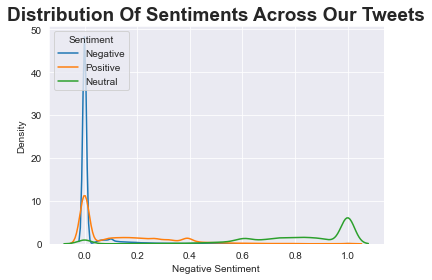

In [11]:
plt.title('Distribution Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(f_data['Negative Sentiment'])
sns.kdeplot(f_data['Positive Sentiment'])
sns.kdeplot(f_data['Neutral Sentiment'])
plt.legend(title='Sentiment', loc='upper left', labels=['Negative', 'Positive', 'Neutral'])
plt.show()

In [ ]:
#Sorting And Feature Engineering
f_data = f_data.sort_values(by='Datetime')
ft_data=f_data.copy()
ft_data['date'] = pd.to_datetime(f_data['Datetime']).dt.date
ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month % 12 // 3 + 1

In [14]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=ft_data['date'], y=ft_data['Positive Sentiment'],name='Positive Sentiments'),row=1, col=1)
fig.add_trace(go.Scatter(x=ft_data['date'], y=ft_data['Negative Sentiment'],name='Negative Sentiments'),row=1, col=2)
fig.update_layout(height=600, width=900, title_text="Distribution Of Daily Sentiments")
fig.show()

In [19]:
b_date_mean = ft_data.groupby(by='date').mean().reset_index()
b_date_std = ft_data.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)


#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)
fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2',
        yref='y2'
)


fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

In [20]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Deviation in Positive Sentiment',  'Daily Deviation in Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Positive Sentiment'],name='Positive Sentiment SD'),
    row=1, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Negative Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2',
        yref='y2'
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Positive Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1',
        yref='y1'
)


fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Negative Sentiment'],name='Negative Sentiment SD'),
    row=2, col=1
)

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Deviation Change With Time")
fig.show()


In [21]:
#Da aggiornare con notizie metaverso
import datetime
b_date_count = ft_data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

fig.add_shape(type="line",
    x0=b_date_count['date'].values[0], y0=b_date_count['Negative Sentiment'].mean(), x1=b_date_count['date'].values[-1], y1=b_date_count['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


###annots
b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')
fig.add_annotation(x=datetime.datetime(2021,2,19), y=b_date_count_dt.loc[pd.Timestamp('2021-02-19'),'year'],
            text=r"Israeli study finds Pfizer vaccine 85% effective after first shot",
            showarrow=True,
            arrowhead=3,
            yshift=5,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,29), y=b_date_count_dt.loc[pd.Timestamp('2021-01-29'),'year'],
            text=r"vaccine found to be effective against variant discovered in U.K.",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-160,bordercolor="#c7c7c7")
fig.add_annotation(x=datetime.datetime(2021,1,8), y=b_date_count_dt.loc[pd.Timestamp('2021-01-8'),'year'],
            text=r"Commission proposes to purchase up to 300 million additional doses of BioNTech-Pfizer vaccine",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-30,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,20), y=b_date_count_dt.loc[pd.Timestamp('2021-01-20'),'year'],
            text=r"The presidency of Joe Biden began",
            showarrow=True,
            arrowhead=3,
            yshift=3,ay=120,bordercolor="#c7c7c7")

fig.update_layout(title='<b>Daily Tweet Count<b>',width=1200)
fig.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



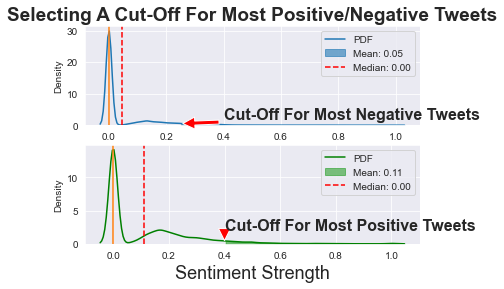

In [22]:
plt.subplot(2,1,1)
plt.title('Selecting A Cut-Off For Most Positive/Negative Tweets',fontsize=19,fontweight='bold')

ax0 = sns.kdeplot(f_data['Negative Sentiment'],bw=0.1)

kde_x, kde_y = ax0.lines[0].get_data()
ax0.fill_between(kde_x, kde_y, where=(kde_x>0.25) ,
                interpolate=True, color='tab:blue',alpha=0.6)

plt.annotate('Cut-Off For Most Negative Tweets', xy=(0.25, 0.5), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')

ax0.axvline(f_data['Negative Sentiment'].mean(), color='r', linestyle='--')
ax0.axvline(f_data['Negative Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Negative Sentiment'],r'Mean: {:.2f}'.format(f_data['Negative Sentiment'].mean()):f_data['Negative Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Negative Sentiment'].median()):f_data['Negative Sentiment'].median()})

plt.subplot(2,1,2)

ax1 = sns.kdeplot(f_data['Positive Sentiment'],bw=0.1,color='green')

plt.annotate('Cut-Off For Most Positive Tweets', xy=(0.4, 0.43), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')
kde_x, kde_y = ax1.lines[0].get_data()
ax1.fill_between(kde_x, kde_y, where=(kde_x>0.4) ,
                interpolate=True, color='tab:green',alpha=0.6)
ax1.set_xlabel('Sentiment Strength',fontsize=18)


ax1.axvline(f_data['Positive Sentiment'].mean(), color='r', linestyle='--')
ax1.axvline(f_data['Positive Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Positive Sentiment'],r'Mean: {:.2f}'.format(f_data['Positive Sentiment'].mean()):f_data['Positive Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Positive Sentiment'].median()):f_data['Positive Sentiment'].median()})

plt.show()

In [23]:
Most_Positive = f_data[f_data['Positive Sentiment'].between(0.4,1)]
Most_Negative = f_data[f_data['Negative Sentiment'].between(0.25,1)]

In [24]:
Most_Negative

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length
0,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12 11:55:28,...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False,0.000001,0.606001,0.394001,5,6.40
13,1337758104847572999,Isabel Winnwa,"Berlin, Germany","Into (EU) politics, books, sports & all things...",2020-03-30 13:47:15,230,652,6098,False,2020-12-12 13:56:01,...,NaN,Twitter for iPhone,0,3,False,0.117001,0.612001,0.270001,15,4.53
14,1337760271151063040,Andy Thomas,London,Retweets not necessarily endorsements.,2009-03-07 20:39:15,1151,4301,95963,False,2020-12-12 14:04:37,...,"['CovidVaccines', 'Pfizervaccine']",Twitter for Android,0,2,False,0.165001,0.549001,0.286001,11,4.18
25,1337776763384958976,Alex Vie,"Los Angeles, CA",Marine vet. Yogi. Krav Maga. Runner. Climber. ...,2010-01-24 04:43:57,125,442,5401,False,2020-12-12 15:10:09,...,"['COVIDIOTS', 'coronavirus', 'CovidVaccine']",Twitter for iPhone,0,0,False,0.179001,0.483001,0.338001,10,6.10
60,1337902845618774018,Fares Bou-Daher,NaN,Direct with a conservative approach in serious...,2020-06-18 22:14:51,18,106,3107,False,2020-12-12 23:31:10,...,"['vaccine', 'vaccination', 'Pfizervaccine', 'C...",Twitter for Android,0,0,False,0.000001,0.694001,0.306001,6,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,1382797571769384963,Jape Puntila,why ask?,"Politiikan seuraaja, yleisten asioiden päivitt...",2017-08-22 15:11:30,272,513,26318,False,2021-04-15 20:46:46,...,NaN,Twitter for iPhone,0,1,False,0.209001,0.444001,0.347001,14,3.64
7974,1382811348334211074,ÁngelaRoiué,"Santander, Spanien","Journalist, with every single letter. ❤️ Audio...",2011-06-24 17:40:46,349,726,3124,False,2021-04-15 21:41:31,...,"['AstraZeneca', 'PfizerBionTech', 'Germany']",Twitter Web App,0,0,False,0.000001,0.738001,0.262001,10,5.00
7980,1382954142436577281,Thomas G.,Salzburg-Austria-Europe-Earth,"+ Familie, reisen, Ehrlichkeit, Toleranz, Musi...",2019-02-03 08:31:13,911,988,25925,False,2021-04-16 07:08:56,...,['PfizerBioNTech'],Twitter for iPhone,0,1,False,0.000001,0.435001,0.565001,2,3.50
8020,1383478699064893460,Mike Draco ex Machina,"Nova Albion, CA",I'll let my tweets chirp for themselves. Lefti...,2008-04-20 15:08:17,1066,677,108196,False,2021-04-17 17:53:20,...,NaN,TweetDeck,0,2,False,0.000001,0.698001,0.302001,19,4.68


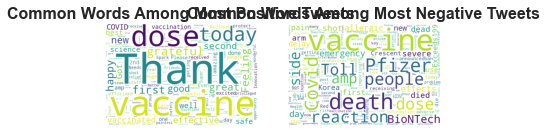

In [25]:
Most_Positive_text = ' '.join(Most_Positive.text)
Most_Negative_text = ' '.join(Most_Negative.text)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

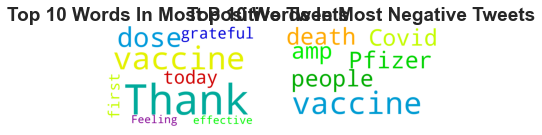

In [26]:
l_t = Most_Positive_text

w1_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w1_dict[w] = w1_dict.get(w,0)+1
w1_dict = {k: v for k, v in sorted(w1_dict.items(), key=lambda item: item[1],reverse=True)}

l_t = Most_Negative_text
w2_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w2_dict[w] = w2_dict.get(w,0)+1
w2_dict = {k: v for k, v in sorted(w2_dict.items(), key=lambda item: item[1],reverse=True)}

top_10_pos = list(w1_dict.keys())[:10]
top_10_neg = list(w2_dict.keys())[:10]

plt.subplot(1,2,1)
w_c = WordCloud(width=600,height=400,collocations = False,colormap='nipy_spectral',background_color='white').generate(' '.join(top_10_pos))
plt.title('Top 10 Words In Most Positive Tweets',fontsize=19,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.subplot(1,2,2)
w_c = WordCloud(width=600,height=400,collocations = False,colormap='nipy_spectral',background_color='white').generate(' '.join(top_10_neg))
plt.title('Top 10 Words In Most Negative Tweets',fontsize=19,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.show()